<a href="https://colab.research.google.com/github/sasukewong/dataset/blob/main/Pghw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from cvxopt import matrix
from cvxopt import solvers
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
X_train = pd.read_csv('/content/sample_data/polydata_data_sampx.txt',sep='\t',header=None)
Y_train = pd.read_csv('/content/sample_data/polydata_data_sampy.txt',sep='\t',header=None)
Y_train=Y_train.drop(columns=[1])
X_train=X_train.T
X_train=X_train.dropna()
X_test = pd.read_csv('/content/sample_data/polydata_data_polyx.txt',sep='\t',header=None)
Y_test = pd.read_csv('/content/sample_data/polydata_data_polyy.txt',sep='\t',header=None)
Y_test=Y_test.drop(columns=[1])
X_test=X_test.T
X_test=X_test.dropna()


# 1(a) Regression Algorithms Implementation

least-squares (LS)

In [46]:
def LS(X_train,Y_train):
  xxx=matrix(np.linalg.inv(np.array(X_train*X_train.T)))
  theta=xxx*X_train*Y_train
  return theta

regularized LS (RLS)

In [49]:
def RLS(ki,Lambda,X_train,Y_train): #ki = k-th order, lambda = λ
  k=ki+1
  λ=Lambda
  #n=X_train.shape[]
  I=np.identity(k)
  I=matrix(I)
  xxx=matrix(np.linalg.inv(np.array(X_train*X_train.T+λ*I)))
  theta=xxx*X_train*Y_train
  return theta

L1-regularized LS (LASSO)

In [52]:
def Lasso(ki,Lambda,X_train,Y_train):
  k=ki+1
  Lambda=Lambda
  xy = X_train*Y_train
  xy = matrix([xy,-xy])
  xxT = X_train*X_train.T
  P1 = matrix([[xxT],[-xxT]])
  P2 = matrix([[-xxT],[xxT]])
  P = matrix([P1,P2])
  q = matrix(Lambda*np.ones((2*k,1)))
  q = q - xy
  G = matrix(-np.identity(2*k))
  h = matrix(np.zeros(2*k))
  sol = solvers.qp(P,q,G,h)
  target=sol['x']
  theta = target[:k]-target[-k:]
  return theta


robust regression (RR)

In [53]:
def Robust(ki,n,X_train,Y_train):
  k=ki+1
  xT=X_train.T
  y=Y_train
  f1 = matrix(np.zeros(k))
  f2 = matrix(np.ones(n))
  f = matrix([f1,f2])
  I = matrix(-np.identity(n))
  B1 = matrix([[-xT],[I]])
  B2 = matrix([[xT],[I]])
  B = matrix([B1,B2])
  c = matrix([-y,y])
  res = solvers.lp(f,B,c)
  theta = res['x'][:k]
  return theta

Bayesian regression (BR)

In [54]:
def BR(ki,X_train,Y_train,prior1,prior2):
  k=ki+1
  s1=(1/prior1)*(np.identity(k))
  s2=(1/prior2)*(X_train*X_train.T)
  sigma=matrix(np.linalg.inv(s1+s2))
  miu=(1/prior2)*(sigma*(X_train*Y_train))
  return sigma, miu


## Predit Data

In [55]:
def Predict(theta,X_test,Y_Test):
  #- - - - - - - - - - - - predic New y - - - - - - - - - - - - - 
  X_test=X_test.T
  y_predit=np.matmul(X_test,theta)
  return y_predit

Predict For BR

In [56]:
def BRPredict(ki,n,sigma,miu,X_test,y_Test):
  #- - - - - - - - - - - - predic New y - - - - - - - - - - - - - 
  #create the matrix of test x(x)
  k=ki+1
  x_test=X_test
  x_test = np.array(x_test) 
  x_testT=x_test.T
  miu2 = np.matmul(x_test.T,miu)
  sigma2 = np.zeros((n,1))
  for ni in range (0,n,1):
    sigma2[ni]=np.matmul(np.matmul(x_testT[ni],sigma),x_testT[ni].T)
  y_predit = miu2
  y_predit_max = miu2+sigma2
  y_predit_min = miu2-sigma2
  return y_predit,y_predit_max,y_predit_min

## Plot and MSE

In [57]:
def Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,Y_predict,method):
  Y_test1=np.array(Y_test)
  MSE=np.square(np.subtract(Y_test1,Y_predict)).mean()
  print("MSE of", method ,"method is ", MSE)
  plt.plot(X_train[0],Y_train[0], 'ko',markersize=2,label='samples')
  plt.plot(X_test[0],Y_predict, '-r',label='function')
  plt.grid()
  plt.legend()
  return MSE
def BR_MSE_Plot(X_train,Y_train,X_test,Y_test,Y_predict,Y_predict_P1,Y_predictM1):
  MSE=np.square(np.subtract(Y_test,Y_predict)).mean()
  print("MSE of BR method is ", MSE[0])
  plt.plot(X_train[0],Y_train[0], 'ko',markersize=2,label='samples')
  plt.plot(X_test[0],Y_predict, '-r',label='function')
  plt.plot(X_test[0],Y_predict_P1, '-y',label='+1σ function')
  plt.plot(X_test[0],Y_predictM1, '-g',label='-1σ function')
  plt.grid()
  plt.legend()
  return MSE[0]

# 1(b)

In [32]:
def Q1_Data_Preparing(k,X_train,Y_train):
  XT=X_train.T
  n=XT.shape[1]
  x=matrix([matrix(np.ones(n))])
  x=x.T
  for i in range (1,k+1,1):
    temp=XT.pow(i)
    temp=matrix(np.array(temp))
    x=matrix([x,temp])

  y_matrix=[]
  for yy in Y_train[0]:
    y_matrix.append(yy)
  y = matrix(y_matrix)
  return x, y

In [ ]:
X_train_1b,Y_train_1b=Q1_Data_Preparing(5,X_train,Y_train)
X_test_1b,Y_test_1b=Q1_Data_Preparing(5,X_test,Y_test)
n=X_train.shape[0]
n1=X_test.shape[0]

Least-squares(LS)

MSE of least-Square(LS) method is  0.40864388356977166


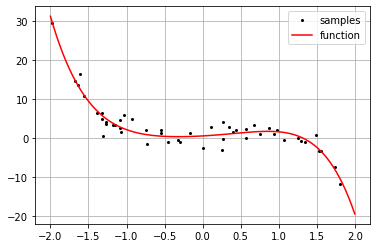

In [ ]:
theta_LS=LS(X_train_1b,Y_train_1b)
LS_y_predict=Predict(theta_LS,X_test_1b,Y_test_1b)
LS100=Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,LS_y_predict,'least-Square(LS)')

regularized LS (RLS)

MSE of regularized LS(RLS) method is  0.40759897101022924


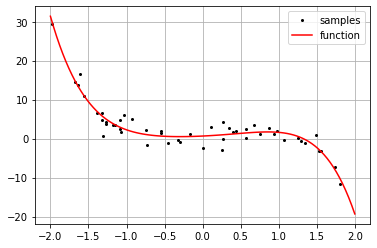

In [ ]:
for i in np.arange (0.0, 1, 0.01):
  print(i)
  theta_RLS=RLS(5,i,X_train_1b,Y_train_1b)
  RLS_y_predict=Predict(theta_RLS,X_test_1b,Y_test_1b)
  RLS100=Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,RLS_y_predict,'regularized LS(RLS)')

     pcost       dcost       gap    pres   dres
 0: -1.0414e+03 -1.0396e+03  3e+01  6e+00  2e-03
 1: -1.0415e+03 -1.0420e+03  6e-01  1e-01  3e-05
 2: -1.0415e+03 -1.0415e+03  6e-03  1e-03  3e-07
 3: -1.0415e+03 -1.0415e+03  6e-05  1e-05  3e-09
 4: -1.0415e+03 -1.0415e+03  6e-07  1e-07  3e-11
 5: -1.0415e+03 -1.0415e+03  6e-09  1e-09  3e-13
Optimal solution found.
MSE of L1-regularized LS(LASSO) method is  0.4086438835745911


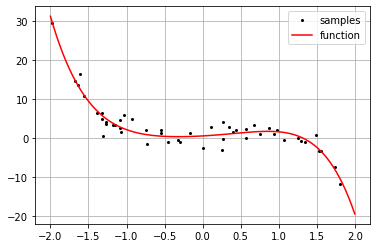

In [ ]:
theta_Lasso=Lasso(5,0,X_train_1b,Y_train_1b)
Lasso_y_predict=Predict(theta_Lasso,X_test_1b,Y_test_1b)
Lasso100=Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.5199e-15  3e+02  9e-01  1e-15  1e+00
 1:  3.9223e+01  3.9399e+01  6e+01  2e-01  3e-15  4e-01
 2:  5.8134e+01  5.8186e+01  1e+01  4e-02  2e-14  1e-01
 3:  6.3314e+01  6.3326e+01  2e+00  7e-03  8e-14  2e-02
 4:  6.4289e+01  6.4291e+01  4e-01  1e-03  4e-14  3e-03
 5:  6.4452e+01  6.4452e+01  7e-02  2e-04  1e-14  6e-04
 6:  6.4483e+01  6.4483e+01  3e-03  8e-06  5e-14  2e-05
 7:  6.4484e+01  6.4484e+01  3e-05  8e-08  2e-13  2e-07
Optimal solution found.
MSE of robust regression(RR) method is  0.7680461505133508


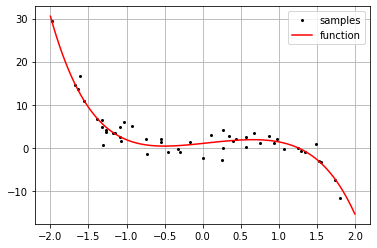

In [ ]:
theta_RBS=Robust(5,n,X_train_1b,Y_train_1b)
RBS_y_predict=Predict(theta_RBS,X_test_1b,Y_test_1b)
RBS100=Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,RBS_y_predict,'robust regression(RR)')

MSE of BR method is  0.4076002237042517


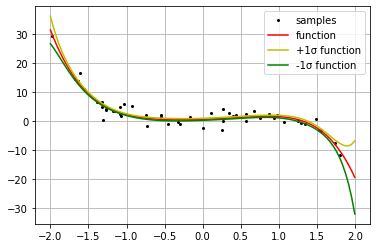

In [ ]:
sigma,miu = BR(5,X_train_1b,Y_train_1b,10,5) #prior1 which is a = 1, prior2 is σ^2 =5
y_predit,y_predit_max,y_predit_min=BRPredict(5,n1,sigma,miu,X_test_1b,Y_test_1b)
BR100=BR_MSE_Plot(X_train,Y_train,X_test,Y_test,y_predit,y_predit_max,y_predit_min)

# 1(c)

Data Split Function

In [ ]:
def Splitdata(percent,X_train,Y_train):
  X = pd.DataFrame()
  Y = pd.DataFrame()
  x = pd.DataFrame()
  y = pd.DataFrame()
  X['x']=X_train[0]
  Y['y']=Y_train[0]
  XY=pd.concat([X, Y], axis=1)
  XY_s= XY.sample(frac=(1+percent)/100,random_state=10000)
  XY_s.reset_index()
  x[0] = XY_s['x'].values
  y[0] = XY_s['y'].values
  return x,y

10% of Sample

In [ ]:
x1_train,y1_train=Splitdata(10,X_train,Y_train)
x1,y1=Q1_Data_Preparing(5,x1_train,y1_train)
n=x1_train.shape[0]
n1=X_test.shape[0]

MSE of least-Square(LS) method is  1197.9659234986214


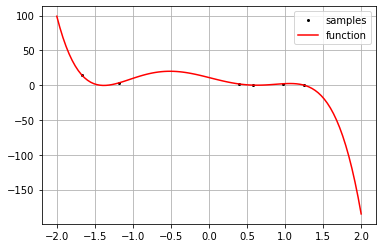

In [ ]:
theta_LS=LS(x1,y1)
LS_y_predict=Predict(theta_LS,X_test_1b,Y_test_1b)
LS10=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,LS_y_predict,'least-Square(LS)')

MSE of regularized LS(RLS) method is  1.9451831250154417


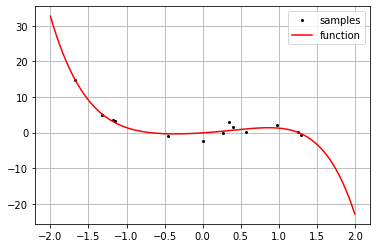

In [ ]:
theta_RLS=RLS(5,0.48,x1,y1)
RLS_y_predict=Predict(theta_RLS,X_test_1b,Y_test_1b)
RLS10=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,RLS_y_predict,'regularized LS(RLS)')

     pcost       dcost       gap    pres   dres
 0: -1.3432e+02 -1.3183e+02  3e+01  6e+00  1e-02
 1: -1.3567e+02 -1.3849e+02  3e+00  7e-01  2e-03
 2: -1.3589e+02 -1.3596e+02  7e-02  1e-02  3e-05
 3: -1.3589e+02 -1.3589e+02  7e-04  1e-04  3e-07
 4: -1.3589e+02 -1.3589e+02  7e-06  1e-06  3e-09
 5: -1.3589e+02 -1.3589e+02  7e-08  1e-08  3e-11
Optimal solution found.
MSE of L1-regularized LS(LASSO) method is  12.200566166862142


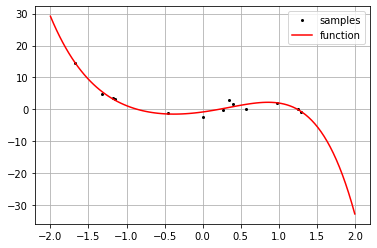

In [ ]:
theta_Lasso=Lasso(5,0,x1,y1)
Lasso_y_predict=Predict(theta_Lasso,X_test_1b,Y_test_1b)
Lasso10=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.3019e-16  6e+00  2e-01  4e-16  1e+00
 1: -8.8925e-15 -5.4728e-15  6e-02  2e-03  1e-15  1e-02
 2: -1.1914e-14 -1.5197e-14  6e-04  2e-05  2e-15  1e-04
 3: -1.0870e-14 -6.3090e-15  6e-06  2e-07  2e-15  1e-06
 4:  1.7172e-15 -8.0819e-16  6e-08  2e-09  1e-15  1e-08
Optimal solution found.
MSE of robust regression(RR) method is  1197.965923493858


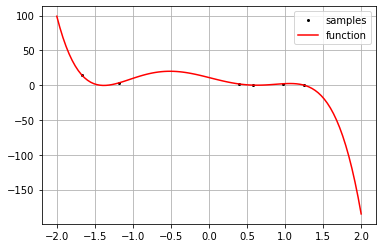

In [ ]:
theta_RBS=Robust(5,n,x1,y1)
RBS_y_predict=Predict(theta_RBS,X_test_1b,Y_test_1b)
RBS10=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,RBS_y_predict,'robust regression(RR)')

MSE of BR method is  0.5777633931040475


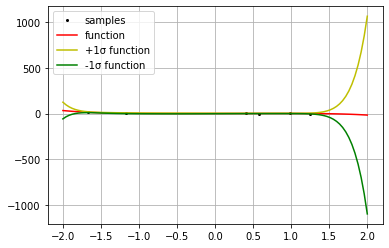

In [ ]:
sigma,miu = BR(5,x1,y1,10,5) #prior1 which is a = 1, prior2 is σ^2 =5
y_predit,y_predit_max,y_predit_min=BRPredict(5,n1,sigma,miu,X_test_1b,Y_test_1b)
BR10=BR_MSE_Plot(x1_train,y1_train,X_test,Y_test,y_predit,y_predit_max,y_predit_min)

25% of Sample

In [ ]:
x1_train,y1_train=Splitdata(25,X_train,Y_train)
x1,y1=Q1_Data_Preparing(5,x1_train,y1_train)
n=x1_train.shape[0]
n1=X_test.shape[0]

MSE of least-Square(LS) method is  12.2005662150529


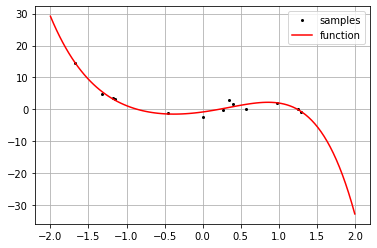

In [ ]:
theta_LS=LS(x1,y1)
LS_y_predict=Predict(theta_LS,X_test_1b,Y_test_1b)
LS25=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,LS_y_predict,'least-Square(LS)')

MSE of regularized LS(RLS) method is  1.9451831250154417


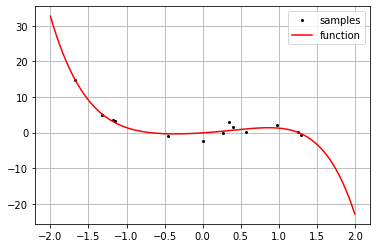

In [ ]:
theta_RLS=RLS(5,0.48,x1,y1)
RLS_y_predict=Predict(theta_RLS,X_test_1b,Y_test_1b)
RLS25=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,RLS_y_predict,'regularized LS(RLS)')

     pcost       dcost       gap    pres   dres
 0: -1.3432e+02 -1.3183e+02  3e+01  6e+00  1e-02
 1: -1.3567e+02 -1.3849e+02  3e+00  7e-01  2e-03
 2: -1.3589e+02 -1.3596e+02  7e-02  1e-02  3e-05
 3: -1.3589e+02 -1.3589e+02  7e-04  1e-04  3e-07
 4: -1.3589e+02 -1.3589e+02  7e-06  1e-06  3e-09
 5: -1.3589e+02 -1.3589e+02  7e-08  1e-08  3e-11
Optimal solution found.
MSE of L1-regularized LS(LASSO) method is  12.200566166862142


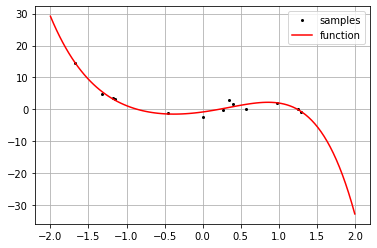

In [ ]:
theta_Lasso=Lasso(5,0,x1,y1)
Lasso_y_predict=Predict(theta_Lasso,X_test_1b,Y_test_1b)
Lasso25=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2420e-16  4e+01  7e-01  3e-16  1e+00
 1:  5.3646e+00  5.3990e+00  7e+00  1e-01  2e-15  2e-01
 2:  7.2405e+00  7.2470e+00  1e+00  2e-02  1e-14  3e-02
 3:  7.4559e+00  7.4569e+00  1e-01  2e-03  8e-15  5e-03
 4:  7.5093e+00  7.5094e+00  2e-02  3e-04  2e-14  6e-04
 5:  7.5147e+00  7.5147e+00  3e-04  6e-06  4e-14  1e-05
 6:  7.5148e+00  7.5148e+00  3e-06  6e-08  3e-14  1e-07
Optimal solution found.
MSE of robust regression(RR) method is  21.021441383723435


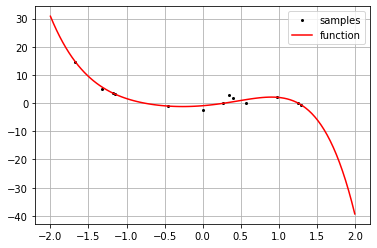

In [ ]:
theta_RBS=Robust(5,n,x1,y1)
RBS_y_predict=Predict(theta_RBS,X_test_1b,Y_test_1b)
RBS25=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,RBS_y_predict,'robust regression(RR)')

MSE of BR method is  1.848735692141449


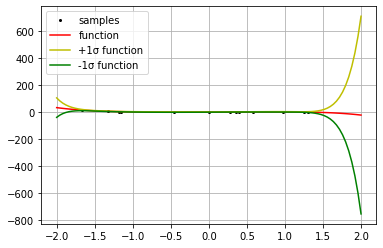

In [ ]:
sigma,miu = BR(5,x1,y1,10,5) #prior1 which is a = 1, prior2 is σ^2 =5
y_predit,y_predit_max,y_predit_min=BRPredict(5,n1,sigma,miu,X_test_1b,Y_test_1b)
BR25=BR_MSE_Plot(x1_train,y1_train,X_test,Y_test,y_predit,y_predit_max,y_predit_min)

50% of Sample

In [ ]:
x1_train,y1_train=Splitdata(50,X_train,Y_train)
x1,y1=Q1_Data_Preparing(5,x1_train,y1_train)
n=x1_train.shape[0]
n1=X_test.shape[0]

MSE of least-Square(LS) method is  0.835999971938015


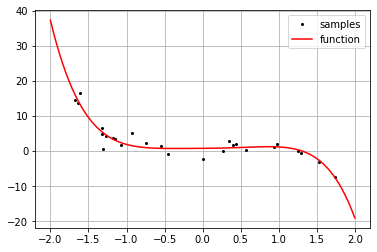

In [ ]:
theta_LS=LS(x1,y1)
LS_y_predict=Predict(theta_LS,X_test_1b,Y_test_1b)
LS50=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,LS_y_predict,'least-Square(LS)')

MSE of regularized LS(RLS) method is  0.748621866187413


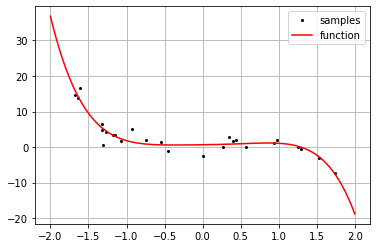

In [ ]:
theta_RLS=RLS(5,0.48,x1,y1)
RLS_y_predict=Predict(theta_RLS,X_test_1b,Y_test_1b)
RLS50=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,RLS_y_predict,'regularized LS(RLS)')

     pcost       dcost       gap    pres   dres
 0: -4.1903e+02 -4.1813e+02  3e+01  5e+00  4e-03
 1: -4.1905e+02 -4.1961e+02  6e-01  1e-01  9e-05
 2: -4.1905e+02 -4.1905e+02  6e-03  1e-03  9e-07
 3: -4.1905e+02 -4.1905e+02  6e-05  1e-05  9e-09
 4: -4.1905e+02 -4.1905e+02  6e-07  1e-07  9e-11
 5: -4.1905e+02 -4.1905e+02  6e-09  1e-09  9e-13
Optimal solution found.
MSE of L1-regularized LS(LASSO) method is  0.8359999716937433


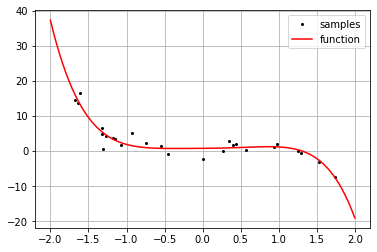

In [ ]:
theta_Lasso=Lasso(5,0,x1,y1)
Lasso_y_predict=Predict(theta_Lasso,X_test_1b,Y_test_1b)
Lasso50=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.5726e-15  1e+02  1e+00  1e-15  1e+00
 1:  1.8052e+01  1.8197e+01  3e+01  2e-01  9e-16  4e-01
 2:  2.6511e+01  2.6549e+01  7e+00  4e-02  7e-15  8e-02
 3:  2.8385e+01  2.8394e+01  1e+00  9e-03  6e-14  2e-02
 4:  2.8711e+01  2.8714e+01  4e-01  2e-03  2e-13  6e-03
 5:  2.8833e+01  2.8834e+01  8e-02  6e-04  4e-14  1e-03
 6:  2.8866e+01  2.8866e+01  1e-03  6e-06  2e-13  2e-05
 7:  2.8867e+01  2.8867e+01  1e-05  6e-08  4e-14  2e-07
Optimal solution found.
MSE of robust regression(RR) method is  0.5642141212730474


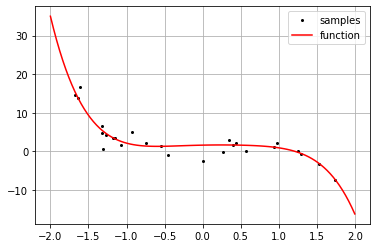

In [ ]:
theta_RBS=Robust(5,n,x1,y1)
RBS_y_predict=Predict(theta_RBS,X_test_1b,Y_test_1b)
RBS50=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,RBS_y_predict,'robust regression(RR)')

MSE of BR method is  0.7469393699492742


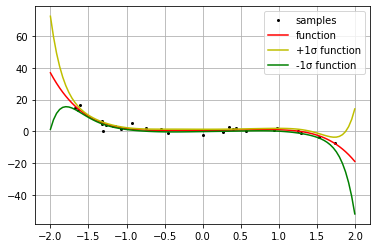

In [ ]:
sigma,miu = BR(5,x1,y1,10,5) #prior1 which is a = 1, prior2 is σ^2 =5
y_predit,y_predit_max,y_predit_min=BRPredict(5,n1,sigma,miu,X_test_1b,Y_test_1b)
BR50=BR_MSE_Plot(x1_train,y1_train,X_test,Y_test,y_predit,y_predit_max,y_predit_min)

75% of Sample

In [ ]:
x1_train,y1_train=Splitdata(75,X_train,Y_train)
x1,y1=Q1_Data_Preparing(5,x1_train,y1_train)
n=x1_train.shape[0]
n1=X_test.shape[0]


MSE of least-Square(LS) method is  0.5474657789806535


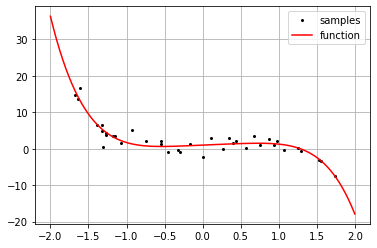

In [ ]:
theta_LS=LS(x1,y1)
LS_y_predict=Predict(theta_LS,X_test_1b,Y_test_1b)
LS75=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,LS_y_predict,'least-Square(LS)')

MSE of regularized LS(RLS) method is  0.5677863629202248


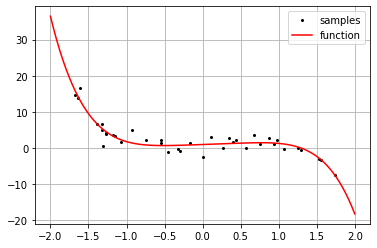

In [ ]:
theta_RLS=RLS(5,0.48,x1,y1)
RLS_y_predict=Predict(theta_RLS,X_test_1b,Y_test_1b)
RLS75=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,RLS_y_predict,'regularized LS(RLS)')

     pcost       dcost       gap    pres   dres
 0: -4.6117e+02 -4.5995e+02  2e+01  5e+00  4e-03
 1: -4.6122e+02 -4.6181e+02  6e-01  1e-01  9e-05
 2: -4.6122e+02 -4.6122e+02  6e-03  1e-03  9e-07
 3: -4.6122e+02 -4.6122e+02  6e-05  1e-05  9e-09
 4: -4.6122e+02 -4.6122e+02  6e-07  1e-07  9e-11
 5: -4.6122e+02 -4.6122e+02  6e-09  1e-09  9e-13
Optimal solution found.
MSE of L1-regularized LS(LASSO) method is  0.5474657790513424


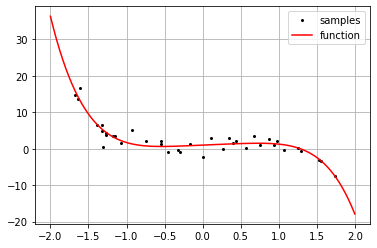

In [ ]:
theta_Lasso=Lasso(5,0,x1,y1)
Lasso_y_predict=Predict(theta_Lasso,X_test_1b,Y_test_1b)
Lasso75=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.9775e-16  2e+02  1e+00  1e-15  1e+00
 1:  2.3821e+01  2.3968e+01  4e+01  2e-01  1e-15  3e-01
 2:  3.7322e+01  3.7353e+01  8e+00  4e-02  6e-15  7e-02
 3:  4.0265e+01  4.0273e+01  2e+00  8e-03  2e-13  2e-02
 4:  4.0907e+01  4.0909e+01  3e-01  2e-03  8e-14  3e-03
 5:  4.1021e+01  4.1021e+01  8e-02  4e-04  4e-13  8e-04
 6:  4.1057e+01  4.1057e+01  1e-03  7e-06  1e-13  2e-05
 7:  4.1058e+01  4.1058e+01  1e-05  7e-08  2e-13  2e-07
Optimal solution found.
MSE of robust regression(RR) method is  0.5648722905028429


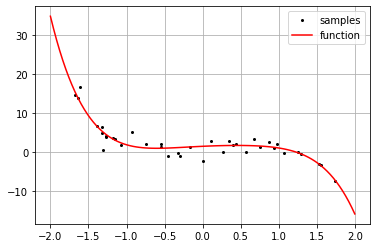

In [ ]:
theta_RBS=Robust(5,n,x1,y1)
RBS_y_predict=Predict(theta_RBS,X_test_1b,Y_test_1b)
RBS75=Regression_MSE_Plot(x1_train,y1_train,X_test,Y_test,RBS_y_predict,'robust regression(RR)')

MSE of BR method is  0.5680530252910168


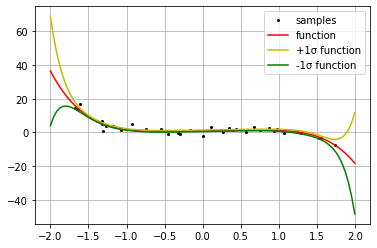

In [ ]:
sigma,miu = BR(5,x1,y1,10,5) #prior1 which is a = 1, prior2 is σ^2 =5
y_predit,y_predit_max,y_predit_min=BRPredict(5,n1,sigma,miu,X_test_1b,Y_test_1b)
BR75=BR_MSE_Plot(x1_train,y1_train,X_test,Y_test,y_predit,y_predit_max,y_predit_min)

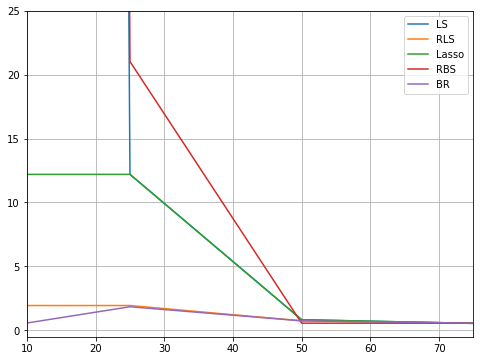

In [ ]:
PLOTMSE = pd.DataFrame(np.array([[LS10,RLS10,Lasso10,RBS10,BR10],[LS25,RLS25,Lasso25,RBS25,BR25],[LS50,RLS50,Lasso50,RBS50,BR50],[LS75,RLS75,Lasso75,RBS75,BR75],[LS100,RLS100,Lasso100,RBS100,BR100]]),
                   columns=['LS', 'RLS', 'Lasso','Robust','BR'])
percent ={'percent': [10, 25, 50, 75, 100]}
percent = pd.DataFrame(data=percent)
fig = plt.figure(figsize=(8, 6))
plt.plot(percent['percent'],PLOTMSE['LS'],label='LS')
plt.plot(percent['percent'],PLOTMSE['RLS'],label='RLS')
plt.plot(percent['percent'],PLOTMSE['Lasso'],label='Lasso')
plt.plot(percent['percent'],PLOTMSE['Robust'],label='RBS')
plt.plot(percent['percent'],PLOTMSE['BR'],label='BR')
plt.ylim(-0.5,25)
plt.xlim(10,75)
plt.grid()
plt.legend()

# 1(d)

In [ ]:
outlierY=pd.DataFrame()
outlierY[0]=Y_train[0]
a=np.random.randint(0,45)
for aa in range (a,a+5,1):
  outlierY[0][aa]=outlierY[0][aa]+50

X_train_1b,Y_train_1b=Q1_Data_Preparing(5,X_train,outlierY)
X_test_1b,Y_test_1b=Q1_Data_Preparing(5,X_test,Y_test)
n=X_train.shape[0]
n1=X_test.shape[0]

MSE of least-Square(LS) method is  29.5366168702557


29.5366168702557

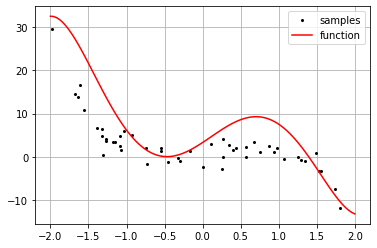

In [ ]:
theta_LS=LS(X_train_1b,Y_train_1b)
LS_y_predict=Predict(theta_LS,X_test_1b,Y_test_1b)
Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,LS_y_predict,'least-Square(LS)')

MSE of regularized LS(RLS) method is  26.005693489100633


26.005693489100633

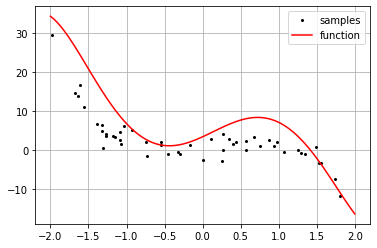

In [ ]:
theta_RLS=RLS(5,0.48,X_train_1b,Y_train_1b)
RLS_y_predict=Predict(theta_RLS,X_test_1b,Y_test_1b)
Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,RLS_y_predict,'regularized LS(RLS)')

     pcost       dcost       gap    pres   dres
 0: -3.3559e+03 -3.2537e+03  3e+02  2e+01  4e-03
 1: -3.3687e+03 -3.3752e+03  7e+00  3e-01  7e-05
 2: -3.3687e+03 -3.3688e+03  7e-02  3e-03  7e-07
 3: -3.3687e+03 -3.3687e+03  7e-04  3e-05  7e-09
 4: -3.3687e+03 -3.3687e+03  7e-06  3e-07  7e-11
 5: -3.3687e+03 -3.3687e+03  7e-08  3e-09  7e-13
Optimal solution found.
MSE of L1-regularized LS(LASSO) method is  29.53661687002765


29.53661687002765

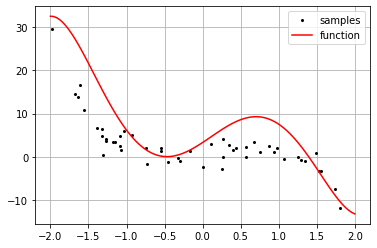

In [ ]:
theta_Lasso=Lasso(5,0,X_train_1b,Y_train_1b)
Lasso_y_predict=Predict(theta_Lasso,X_test_1b,Y_test_1b)
Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -8.0726e-15  2e+03  3e+00  1e-15  1e+00
 1:  2.3384e+02  2.3601e+02  7e+02  7e-01  6e-15  2e+00
 2:  2.6091e+02  2.6133e+02  1e+02  1e-01  4e-14  5e-01
 3:  2.9019e+02  2.9040e+02  4e+01  4e-02  7e-15  2e-01
 4:  3.0042e+02  3.0048e+02  1e+01  1e-02  2e-14  7e-02
 5:  3.0320e+02  3.0322e+02  2e+00  3e-03  2e-14  2e-02
 6:  3.0395e+02  3.0395e+02  6e-01  7e-04  9e-14  5e-03
 7:  3.0412e+02  3.0412e+02  2e-01  2e-04  1e-12  1e-03
 8:  3.0419e+02  3.0419e+02  5e-03  5e-06  8e-13  5e-05
 9:  3.0419e+02  3.0419e+02  5e-05  5e-08  2e-13  5e-07
Optimal solution found.
MSE of robust regression(RR) method is  0.6075465836486159


0.6075465836486159

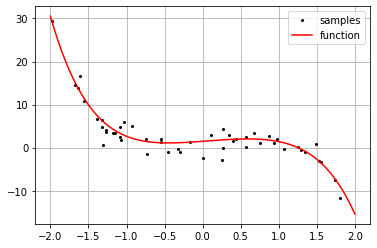

In [ ]:
theta_RBS=Robust(5,n,X_train_1b,Y_train_1b)
RBS_y_predict=Predict(theta_RBS,X_test_1b,Y_test_1b)
Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,RBS_y_predict,'robust regression(RR)')

MSE of BR method is  25.91266400824676


25.91266400824676

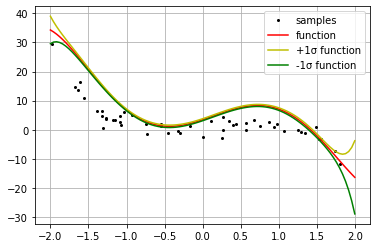

In [ ]:
sigma,miu = BR(5,X_train_1b,Y_train_1b,10,5) #prior1 which is a = 1, prior2 is σ^2 =5
y_predit,y_predit_max,y_predit_min=BRPredict(5,n1,sigma,miu,X_test_1b,Y_test_1b)
BR_MSE_Plot(X_train,Y_train,X_test,Y_test,y_predit,y_predit_max,y_predit_min)

# 1(e)

In [ ]:
X_train_1b,Y_train_1b=Q1_Data_Preparing(10,X_train,Y_train)
X_test_1b,Y_test_1b=Q1_Data_Preparing(10,X_test,Y_test)
n=X_train.shape[0]
n1=X_test.shape[0]

MSE of least-Square(LS) method is  7.983106592680692


7.983106592680692

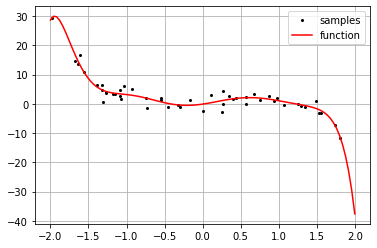

In [ ]:
theta_LS=LS(X_train_1b,Y_train_1b)
LS_y_predict=Predict(theta_LS,X_test_1b,Y_test_1b)
Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,LS_y_predict,'least-Square(LS)')

MSE of regularized LS(RLS) method is  13.49094405449796


13.49094405449796

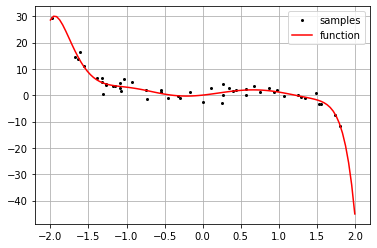

In [ ]:
theta_RLS=RLS(10,0.01,X_train_1b,Y_train_1b)
RLS_y_predict=Predict(theta_RLS,X_test_1b,Y_test_1b)
Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,RLS_y_predict,'regularized LS(RLS)')

     pcost       dcost       gap    pres   dres
 0: -1.0501e+03 -1.0439e+03  9e+01  1e+01  2e-04
 1: -1.0526e+03 -1.0630e+03  1e+01  1e+00  3e-05
 2: -1.0543e+03 -1.0578e+03  4e+00  3e-01  6e-06
 3: -1.0546e+03 -1.0550e+03  5e-01  2e-02  3e-07
 4: -1.0548e+03 -1.0548e+03  4e-02  1e-03  2e-08
 5: -1.0548e+03 -1.0548e+03  6e-03  1e-04  3e-09
 6: -1.0548e+03 -1.0548e+03  3e-04  3e-06  5e-11
 7: -1.0548e+03 -1.0548e+03  3e-06  3e-08  5e-13
Optimal solution found.
MSE of L1-regularized LS(LASSO) method is  9.051741713470683


9.051741713470683

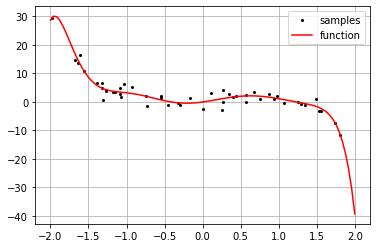

In [ ]:
theta_Lasso=Lasso(10,0.01,X_train_1b,Y_train_1b)
Lasso_y_predict=Predict(theta_Lasso,X_test_1b,Y_test_1b)
Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.5199e-15  3e+02  8e-01  1e-14  1e+00
 1:  3.7380e+01  3.7498e+01  5e+01  2e-01  8e-12  3e-01
 2:  5.2374e+01  5.2407e+01  1e+01  3e-02  2e-11  8e-02
 3:  5.6178e+01  5.6185e+01  2e+00  6e-03  1e-10  2e-02
 4:  5.6860e+01  5.6862e+01  4e-01  1e-03  4e-12  3e-03
 5:  5.6989e+01  5.6990e+01  9e-02  3e-04  4e-10  7e-04
 6:  5.7021e+01  5.7021e+01  9e-03  3e-05  2e-09  7e-05
 7:  5.7025e+01  5.7025e+01  1e-04  4e-07  4e-10  1e-06
 8:  5.7025e+01  5.7025e+01  1e-06  4e-09  3e-08  1e-08
Optimal solution found.
MSE of robust regression(RR) method is  1.2898574922974373


1.2898574922974373

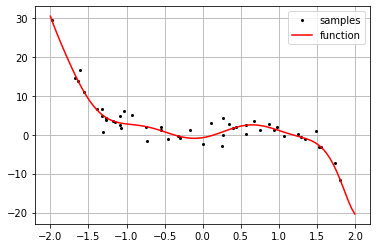

In [ ]:
theta_RBS=Robust(10,n,X_train_1b,Y_train_1b)
RBS_y_predict=Predict(theta_RBS,X_test_1b,Y_test_1b)
Regression_MSE_Plot(X_train,Y_train,X_test,Y_test,RBS_y_predict,'robust regression(RR)')

MSE of BR method is  3.0432536006138298


3.0432536006138298

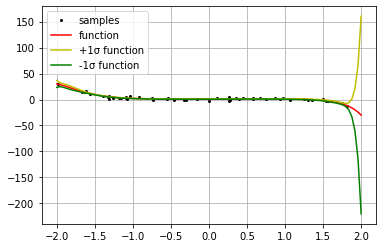

In [ ]:
sigma,miu = BR(10,X_train_1b,Y_train_1b,1,5) #prior1 which is a = 1, prior2 is σ^2 =5
y_predit,y_predit_max,y_predit_min=BRPredict(10,n1,sigma,miu,X_test_1b,Y_test_1b)
BR_MSE_Plot(X_train,Y_train,X_test,Y_test,y_predit,y_predit_max,y_predit_min)

# 2(a)

In [58]:
X_train = pd.read_csv('/content/sample_data/count_data_trainx.txt',sep='\t',header=None)
Y_train = pd.read_csv('/content/sample_data/count_data_trainy.txt',sep='\t',header=None)
Y_train=Y_train.drop(columns=[1])
X_train=X_train.T
X_train=X_train.dropna()
X_train=X_train.T
X_test = pd.read_csv('/content/sample_data/count_data_testx.txt',sep='\t',header=None)
Y_test = pd.read_csv('/content/sample_data/count_data_testy.txt',sep='\t',header=None)
Y_test=Y_test.drop(columns=[1])
X_test=X_test.T
X_test=X_test.dropna()
X_test=X_test.T

In [59]:
n=X_train.shape[1]
n1=X_test.shape[1]
n

400

  MAE

In [60]:
def MAE(Y_test,Y_predict,method):
  Y_test1=np.array(Y_test)
  MAE=np.abs(np.subtract(Y_test1,Y_predict)).mean()
  print("MAE of", method ,"method is ", MAE)

In [61]:
X_train_1b=matrix(X_train.values)
Y_train_1b=matrix(Y_train.values)
X_test_1b=matrix(X_test.values)
Y_test_1b=matrix(Y_test.values)

MAE of least-Square(LS) method is  1.3584435211465893
MSE of least-Square(LS) method is  3.1028380141344654


3.1028380141344654

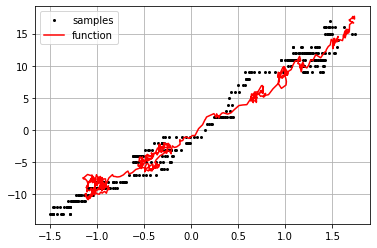

In [62]:
theta_LS=LS(X_train_1b,Y_train_1b)
LS_y_predict=Predict(theta_LS,X_test_1b,Y_test_1b)
MAE(Y_test,LS_y_predict,'least-Square(LS)')
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,LS_y_predict,'least-Square(LS)')

MAE of regularized LS(RLS) method is  1.276561641239274
MSE of regularized LS(RLS) method is  2.6249555298516762


2.6249555298516762

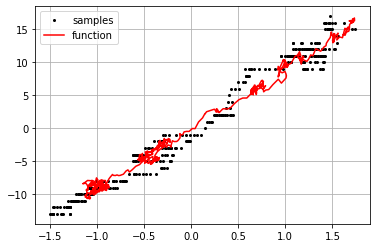

In [67]:
theta_RLS=RLS(8,0.65,X_train_1b,Y_train_1b)
RLS_y_predict=Predict(theta_RLS,X_test_1b,Y_test_1b)
MAE(Y_test,RLS_y_predict,'regularized LS(RLS)')
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,RLS_y_predict,'regularized LS(RLS)')

     pcost       dcost       gap    pres   dres
 0: -1.7504e+04 -1.7007e+04  6e+02  4e+01  6e-04
 1: -1.7111e+04 -1.7156e+04  5e+01  5e-15  6e-16
 2: -1.7139e+04 -1.7147e+04  8e+00  5e-16  2e-16
 3: -1.7141e+04 -1.7143e+04  2e+00  3e-16  2e-16
 4: -1.7142e+04 -1.7142e+04  1e-01  5e-16  2e-16
 5: -1.7142e+04 -1.7142e+04  2e-03  4e-15  2e-16
Optimal solution found.
MAE of L1-regularized LS(LASSO) method is  1.2520374129345924
MSE of L1-regularized LS(LASSO) method is  2.449194977001973


2.449194977001973

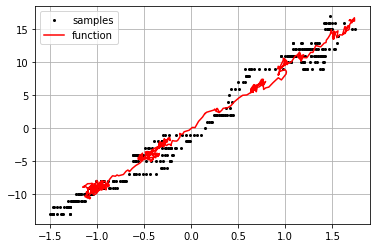

In [69]:
theta_Lasso=Lasso(8,4,X_train_1b,Y_train_1b)
Lasso_y_predict=Predict(theta_Lasso,X_test_1b,Y_test_1b)
MAE(Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  1.1222e-14  2e+03  6e-01  9e-16  1e+00
 1:  1.7856e+02  1.7869e+02  4e+02  1e-01  3e-15  3e-01
 2:  3.3102e+02  3.3105e+02  9e+01  2e-02  2e-14  8e-02
 3:  3.6933e+02  3.6934e+02  2e+01  6e-03  3e-14  2e-02
 4:  3.7769e+02  3.7769e+02  6e+00  2e-03  7e-14  6e-03
 5:  3.7998e+02  3.7998e+02  2e+00  4e-04  5e-13  2e-03
 6:  3.8069e+02  3.8069e+02  3e-01  8e-05  1e-13  3e-04
 7:  3.8080e+02  3.8080e+02  6e-02  2e-05  2e-13  6e-05
 8:  3.8083e+02  3.8083e+02  1e-02  3e-06  3e-12  2e-05
 9:  3.8083e+02  3.8083e+02  2e-04  6e-08  1e-13  2e-07
Optimal solution found.
MAE of robust regression(RR) method is  1.364567082152402
MSE of robust regression(RR) method is  3.118997118962897


3.118997118962897

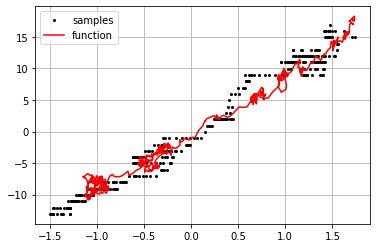

In [ ]:
theta_RBS=Robust(8,n,X_train_1b,Y_train_1b)
RBS_y_predict=Predict(theta_RBS,X_test_1b,Y_test_1b)
MAE(Y_test,RBS_y_predict,'robust regression(RR)')
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,RBS_y_predict,'robust regression(RR)')

MAE of BR method is  1.2794692084961927
MSE of BR method is  2.6503715010376943


2.6503715010376943

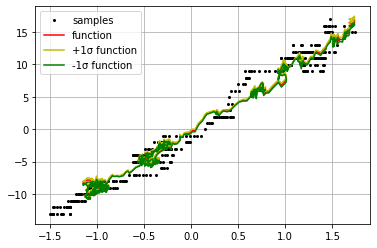

In [ ]:
sigma,miu = BR(8,X_train_1b,Y_train_1b,10,5) #prior1 which is a = 1, prior2 is σ^2 =5
y_predit,y_predit_max,y_predit_min=BRPredict(8,n1,sigma,miu,X_test_1b,Y_test_1b)
MAE(Y_test,y_predit,'BR')
BR_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,y_predit,y_predit_max,y_predit_min)

# 2(b)

In [70]:
X_train_1b=matrix(X_train.values)
Y_train_1b=matrix(Y_train.values)
X_test_1b=matrix(X_test.values)
Y_test_1b=matrix(Y_test.values)
b2=X_train.pow(2)
c2=X_test.pow(2)
X_train_2b=matrix(b2.values)
X_Test_2b=matrix(c2.values)
X_train_1b=matrix([X_train_1b,X_train_2b])
X_test_1b=matrix([X_test_1b,X_Test_2b])

MAE of least-Square(LS) method is  1.3267461241107625
MSE of least-Square(LS) method is  2.923594026731739


2.923594026731739

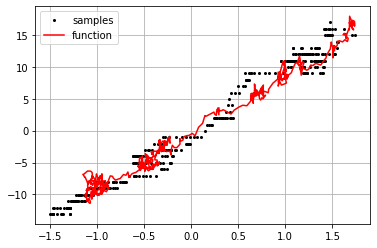

In [71]:
theta_LS=LS(X_train_1b,Y_train_1b)
LS_y_predict=Predict(theta_LS,X_test_1b,Y_test_1b)
MAE(Y_test,LS_y_predict,'least-Square(LS)')
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,LS_y_predict,'least-Square(LS)')

MAE of regularized LS(RLS) method is  1.2076170319220865
MSE of regularized LS(RLS) method is  2.425266583181199


2.425266583181199

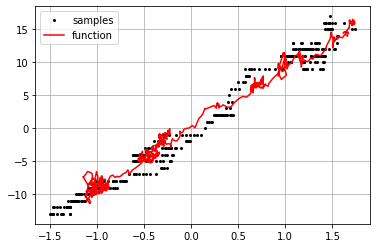

In [73]:
theta_RLS=RLS(17,0.57,X_train_1b,Y_train_1b)
RLS_y_predict=Predict(theta_RLS,X_test_1b,Y_test_1b)
MAE(Y_test,RLS_y_predict,'regularized LS(RLS)')
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,RLS_y_predict,'regularized LS(RLS)')

     pcost       dcost       gap    pres   dres
 0: -1.7580e+04 -1.6830e+04  1e+03  6e+01  1e-03
 1: -1.7026e+04 -1.7209e+04  2e+02  6e-15  7e-16
 2: -1.7176e+04 -1.7200e+04  2e+01  2e-15  5e-16
 3: -1.7187e+04 -1.7191e+04  4e+00  2e-15  3e-16
 4: -1.7189e+04 -1.7190e+04  6e-01  4e-15  2e-16
 5: -1.7189e+04 -1.7189e+04  2e-02  2e-15  2e-16
 6: -1.7189e+04 -1.7189e+04  3e-04  3e-16  2e-16
Optimal solution found.
MAE of L1-regularized LS(LASSO) method is  1.177775488529093
MSE of L1-regularized LS(LASSO) method is  2.265696978625428


2.265696978625428

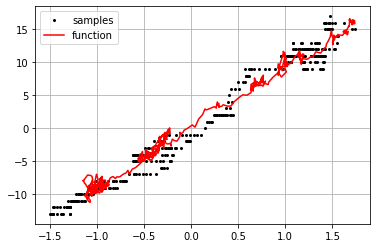

In [75]:
theta_Lasso=Lasso(17,3,X_train_1b,Y_train_1b)
Lasso_y_predict=Predict(theta_Lasso,X_test_1b,Y_test_1b)
MAE(Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')

MAE of robust regression(RR) method is  1.364567082152402
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  1.1222e-14  2e+03  5e-01  7e-15  1e+00
 1:  1.9207e+02  1.9216e+02  3e+02  8e-02  5e-15  3e-01
 2:  3.1483e+02  3.1486e+02  8e+01  2e-02  2e-14  7e-02
 3:  3.4722e+02  3.4723e+02  2e+01  5e-03  5e-14  2e-02
 4:  3.5429e+02  3.5430e+02  6e+00  2e-03  2e-13  6e-03
 5:  3.5652e+02  3.5652e+02  2e+00  7e-04  3e-13  3e-03
 6:  3.5727e+02  3.5727e+02  1e+00  3e-04  5e-13  1e-03
 7:  3.5771e+02  3.5771e+02  2e-01  5e-05  2e-12  2e-04
 8:  3.5778e+02  3.5778e+02  6e-02  2e-05  2e-11  7e-05
 9:  3.5780e+02  3.5780e+02  2e-02  4e-06  5e-12  2e-05
10:  3.5781e+02  3.5781e+02  2e-03  5e-07  1e-11  2e-06
11:  3.5781e+02  3.5781e+02  3e-05  8e-09  3e-12  4e-08
Optimal solution found.
MSE of robust regression(RR) method is  2.8981286923402094


2.8981286923402094

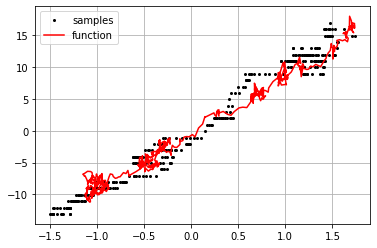

In [ ]:
MAE(Y_test,RBS_y_predict,'robust regression(RR)')
theta_RBS=Robust(17,n,X_train_1b,Y_train_1b)
RBS_y_predict=Predict(theta_RBS,X_test_1b,Y_test_1b)
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,RBS_y_predict,'robust regression(RR)')

MAE of BR method is  1.2794692084961927
MSE of BR method is  2.4277679741345732


2.4277679741345732

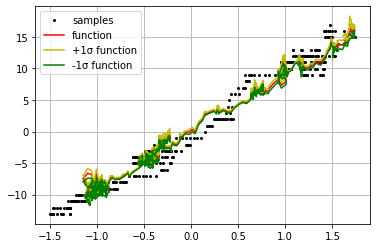

In [ ]:
MAE(Y_test,y_predit,'BR')
sigma,miu = BR(17,X_train_1b,Y_train_1b,10,5) #prior1 which is a = 1, prior2 is σ^2 =5
y_predit,y_predit_max,y_predit_min=BRPredict(17,n1,sigma,miu,X_test_1b,Y_test_1b)
BR_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,y_predit,y_predit_max,y_predit_min)

other non-linerar

In [77]:
X_train_1b=matrix(X_train.values)
Y_train_1b=matrix(Y_train.values)
X_test_1b=matrix(X_test.values)
Y_test_1b=matrix(Y_test.values)
b2=X_train.pow(2)
c2=X_test.pow(2)
b3=X_train.pow(3)
c3=X_test.pow(3)
b4=X_train.pow(4)
c4=X_test.pow(4)
b2=matrix(b2.values)
c2=matrix(c2.values)
b3=matrix(b3.values)
c3=matrix(c3.values)
b4=matrix(b4.values)
c4=matrix(c4.values)
X_train_1b=matrix([X_train_1b,b2,b3,b4])
X_test_1b=matrix([X_test_1b,c2,c3,c4])
X_train_1b


<36x400 matrix, tc='d'>

MAE of least-Square(LS) method is  1.4071801345384134
MSE of least-Square(LS) method is  3.4772651252823397


3.4772651252823397

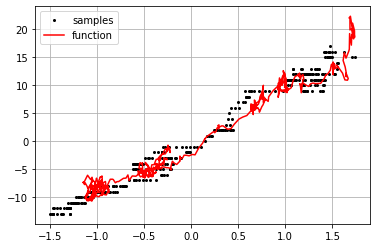

In [78]:
theta_LS=LS(X_train_1b,Y_train_1b)
LS_y_predict=Predict(theta_LS,X_test_1b,Y_test_1b)
MAE(Y_test,LS_y_predict,'least-Square(LS)')
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,LS_y_predict,'least-Square(LS)')

MAE of regularized LS(RLS) method is  1.4422465819635184
MSE of regularized LS(RLS) method is  3.348421683218633


3.348421683218633

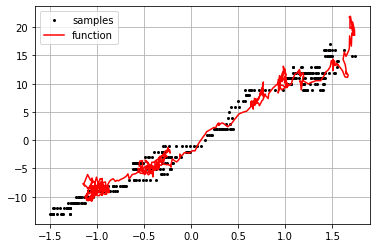

In [82]:
MAE(Y_test,RLS_y_predict,'regularized LS(RLS)')
theta_RLS=RLS(35,0.1,X_train_1b,Y_train_1b)
RLS_y_predict=Predict(theta_RLS,X_test_1b,Y_test_1b)
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,RLS_y_predict,'regularized LS(RLS)')

     pcost       dcost       gap    pres   dres
 0: -1.0554e+05 -1.7283e+04  2e+04  3e+02  5e-14
 1: -2.6572e+04 -1.7128e+04  2e+03  4e+01  5e-14
 2: -1.8650e+04 -1.6930e+04  4e+02  7e+00  7e-15
 3: -1.6997e+04 -1.6881e+04  5e+01  5e-01  9e-16
 4: -1.6874e+04 -1.6867e+04  9e+00  5e-02  3e-16
 5: -1.6864e+04 -1.6864e+04  2e+00  8e-03  3e-16
 6: -1.6863e+04 -1.6863e+04  2e-01  3e-16  3e-16
 7: -1.6863e+04 -1.6863e+04  1e-02  9e-16  3e-16
Optimal solution found.
MAE of L1-regularized LS(LASSO) method is  1.2267643157876837
MSE of L1-regularized LS(LASSO) method is  2.4478597569623677


2.4478597569623677

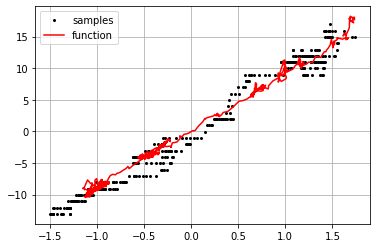

In [88]:
theta_Lasso=Lasso(35,35,X_train_1b,Y_train_1b)
Lasso_y_predict=Predict(theta_Lasso,X_test_1b,Y_test_1b)
MAE(Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,Lasso_y_predict,'L1-regularized LS(LASSO)')

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  1.1222e-14  2e+03  4e-01  2e-14  1e+00
 1:  1.3756e+02  1.3762e+02  3e+02  7e-02  3e-14  2e-01
 2:  2.2127e+02  2.2129e+02  1e+02  3e-02  2e-13  1e-01
 3:  2.5604e+02  2.5605e+02  4e+01  1e-02  4e-13  3e-02
 4:  2.6688e+02  2.6688e+02  1e+01  4e-03  7e-13  1e-02
 5:  2.7153e+02  2.7153e+02  5e+00  1e-03  8e-13  5e-03
 6:  2.7340e+02  2.7340e+02  1e+00  3e-04  1e-12  1e-03
 7:  2.7379e+02  2.7379e+02  3e-01  7e-05  9e-12  3e-04
 8:  2.7388e+02  2.7388e+02  8e-02  2e-05  8e-12  9e-05
 9:  2.7391e+02  2.7391e+02  3e-03  9e-07  1e-11  4e-06
10:  2.7392e+02  2.7392e+02  3e-05  9e-09  4e-12  4e-08
Optimal solution found.
MAE of robust regression(RR) method is  1.428627669769132
MSE of robust regression(RR) method is  3.5185746090370897


3.5185746090370897

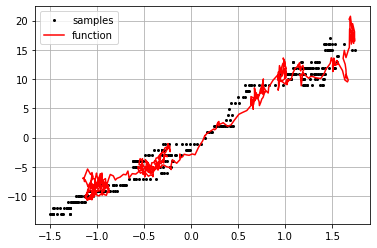

In [ ]:
theta_RBS=Robust(35,n,X_train_1b,Y_train_1b)
RBS_y_predict=Predict(theta_RBS,X_test_1b,Y_test_1b)
MAE(Y_test,RBS_y_predict,'robust regression(RR)')
Regression_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,RBS_y_predict,'robust regression(RR)')

MAE of BR method is  1.4336776125225101
MSE of BR method is  3.4268853388862968


3.4268853388862968

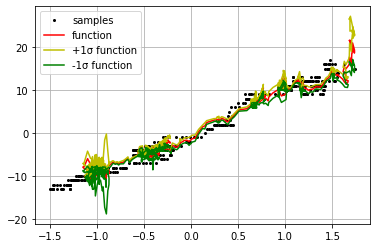

In [ ]:
MAE(Y_test,y_predit,'BR')
sigma,miu = BR(35,X_train_1b,Y_train_1b,10,5) #prior1 which is a = 1, prior2 is σ^2 =5
y_predit,y_predit_max,y_predit_min=BRPredict(35,n1,sigma,miu,X_test_1b,Y_test_1b)
BR_MSE_Plot(X_train.loc,Y_train,X_test.loc,Y_test,y_predit,y_predit_max,y_predit_min)